**events_train.csv** - данные о действиях, которые совершают студенты со стэпами

1. step_id - id стэпа
2. user_id - анонимизированный id юзера
3. timestamp - время наступления события в формате unix date
4. action - событие, возможные значения: 
* discovered - пользователь перешел на стэп
* viewed - просмотр шага,
* started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
* passed - удачное решение практического шага

**submissions_train.csv** - данные о времени и статусах сабмитов к практическим заданиям

1. step_id - id стэпа
2. timestamp - время отправки решения в формате unix date
3. submission_status - статус решения
4. user_id - анонимизированный id юзера

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (9, 6)})

In [210]:
event_data = pd.read_csv('test/contest/event_data_train.csv')

In [223]:
submissions_data = pd.read_csv('test/contest/submissions_data_train.csv')

In [6]:
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [7]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


---
Добавим колонки даты и дня

In [211]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')

In [224]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [212]:
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [11]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [12]:
event_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [213]:
event_data['day'] = event_data.date.dt.date

In [225]:
submissions_data['day'] = submissions_data.date.dt.date

In [214]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


---
Приход новых пользователей

<AxesSubplot:xlabel='day'>

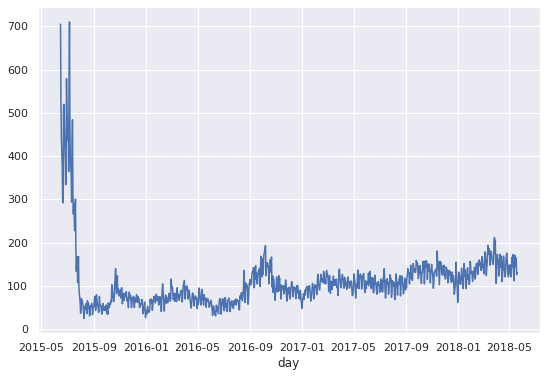

In [17]:
event_data.groupby('day').user_id.nunique().plot()

In [18]:
event_data.loc[(event_data.step_id == 32815) & (event_data.action == 'discovered')].shape[0]

11788

<AxesSubplot:xlabel='day'>

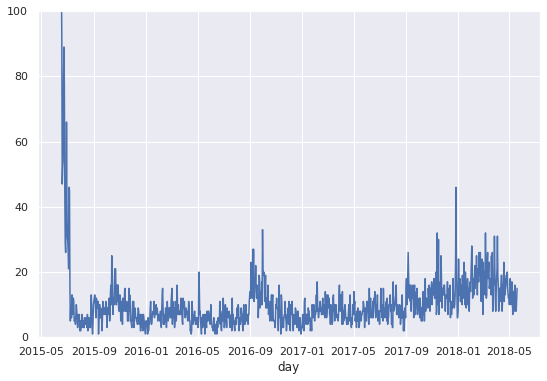

In [19]:
event_data.loc[(event_data.step_id == 32815) & (event_data.action == 'discovered')]\
    .groupby('day').user_id.nunique().plot(ylim=[0,100])

In [20]:
event_data.user_id.nunique()

19234

In [21]:
event_data.groupby('user_id').head(1).shape[0]

19234

<AxesSubplot:xlabel='day'>

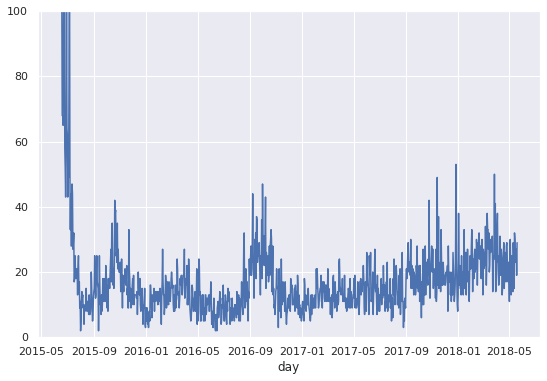

In [22]:
event_data.groupby('user_id').head(1).groupby('day').user_id.nunique().plot(ylim=[0,100])

---
Распределение по законченным степам

<AxesSubplot:>

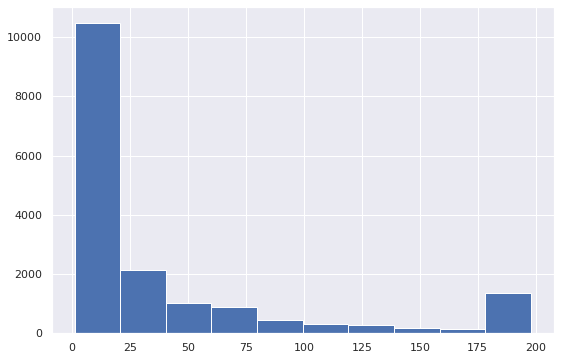

In [23]:
event_data[event_data.action == 'passed']\
    .groupby('user_id', as_index=False) \
    .agg(passed_steps=('user_id', 'count')).passed_steps.hist()

In [24]:
users_event_data = event_data\
    .pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index()

In [25]:
users_event_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [26]:
passed_by_users = pd.crosstab(event_data.user_id, event_data.action)\
    .reset_index()
#     .passed.hist()
#     .groupby('passed', as_index=False)\
#     .agg(users=('user_id', 'count'))

In [27]:
passed_by_users

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [28]:
users_event_data.equals(passed_by_users)

True

In [29]:
submissions_data.columns

Index(['step_id', 'timestamp', 'submission_status', 'user_id', 'date', 'day'], dtype='object')

In [30]:
submissions_data.user_id.nunique()

9940

In [31]:
users_scores = submissions_data\
    .pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index()

In [1]:
users_scores

NameError: name 'users_scores' is not defined

In [33]:
pd.crosstab([submissions_data.step_id, submissions_data.user_id], submissions_data.submission_status).wrong.idxmax()

(33351, 12265)

In [34]:
submissions_data.loc[(submissions_data.step_id == 33351) & (submissions_data.user_id == 12265)]

,step_id,timestamp,submission_status,user_id,date,day
482586,33351,1524912117,wrong,12265,2018-04-28 10:41:57,2018-04-28
482587,33351,1524912129,wrong,12265,2018-04-28 10:42:09,2018-04-28
482588,33351,1524912137,wrong,12265,2018-04-28 10:42:17,2018-04-28
482589,33351,1524912146,wrong,12265,2018-04-28 10:42:26,2018-04-28
482590,33351,1524912158,wrong,12265,2018-04-28 10:42:38,2018-04-28
...,...,...,...,...,...,...
482861,33351,1525354528,wrong,12265,2018-05-03 13:35:28,2018-05-03
482862,33351,1525355069,wrong,12265,2018-05-03 13:44:29,2018-05-03
482863,33351,1525355074,wrong,12265,2018-05-03 13:44:34,2018-05-03
482864,33351,1525355138,wrong,12265,2018-05-03 13:45:38,2018-05-03


---
Сколько дней юзер отсутствовал

In [35]:
gap_data = event_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [36]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [37]:
gap_data = gap_data / (24 * 60 * 60)

In [38]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

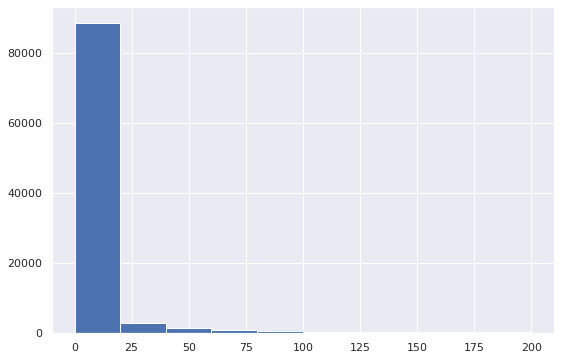

In [39]:
gap_data[gap_data < 200].hist()

In [40]:
gap_data.quantile(.9)

18.325995370370403

In [41]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [42]:
gap_data = event_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').agg({'timestamp': 'count'})

In [43]:
gap_data[gap_data.timestamp == max(gap_data.timestamp)]

,timestamp
user_id,
1046,478


In [44]:
event_data.tail(1)

,step_id,timestamp,action,user_id,date,day
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


---
Юзер дропнулся?

In [45]:
users_data = event_data.groupby('user_id', as_index=False) \
    .agg(last_timestamp=('timestamp', 'max'))

In [46]:
now = 1526772811
drop_out_threshold = 30 * 24 * 60 * 60

In [47]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [48]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [49]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [50]:
users_data = users_data.merge(users_scores, how='outer')

In [51]:
users_data = users_data.fillna(0)

In [52]:
users_data = users_data.merge(users_event_data, how='outer')

In [2]:
users_data.head()

NameError: name 'users_data' is not defined

In [54]:
users_days = event_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [55]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [56]:
users_data = users_data.merge(users_days, how='outer')

In [57]:
users_data.user_id.nunique()

19234

In [58]:
event_data.user_id.nunique()

19234

In [59]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [60]:
users_data['passed_course'] = users_data.passed > 170

In [61]:
users_data.passed_course.value_counts(normalize=True)

False    0.925912
True     0.074088
Name: passed_course, dtype: float64

In [62]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [63]:
users_data.to_csv('test/contest/users_data_before_2.10.csv', encoding='utf-8', index=False)

---
Первые 3 дня на курсе

<AxesSubplot:>

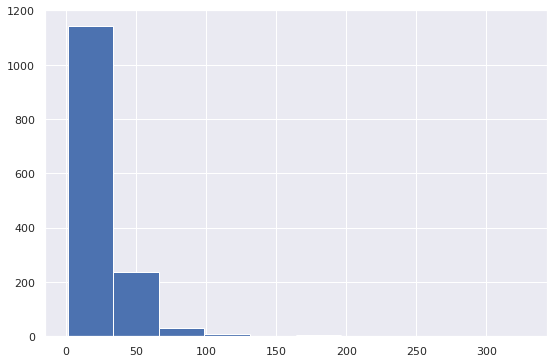

In [65]:
users_data[users_data.passed_course].day.hist()

In [69]:
user_min_time = event_data.groupby('user_id', as_index=False) \
    .agg(min_timestamp=('timestamp', 'min'))

In [70]:
users_data = users_data.merge(user_min_time, how='outer')

In [215]:
day3d = 3* 24 * 60 * 60
event_data_train = event_data.merge(user_min_time, how='outer')\
    .query('timestamp <= min_timestamp + @day3d')\
    .drop('min_timestamp', axis=1)

In [216]:
event_data_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [100]:
# def filter3days(df):
#     print(df.iloc[0].user_id)
#     result = pd.DataFrame()
#     umt = user_min_time.loc[df.iloc[0].user_id].min_timestamp
#     for i in range(df.shape[0]):
#          if df.iloc[i].timestamp <= umt:
#              result.append(df.iloc[i])
#     return result
# event_data.groupby('user_id').apply(filter3days)

---
задача о бросающих курс

In [127]:
steps = pd.crosstab(event_data.step_id, event_data.action)\
    .query('started_attempt > 0')\
    .assign(diff=lambda x: x.viewed - x.passed)\
    .sort_values('diff', ascending=False)

In [128]:
steps

action,discovered,passed,started_attempt,viewed,diff
step_id,,,,,
32031,5751,4633,6316,24726,20093
32202,4816,3691,5321,21606,17915
32206,4716,3306,4815,18509,15203
31978,6684,5675,7611,20695,15020
32075,4986,4321,5439,16046,11725
...,...,...,...,...,...
33998,1698,1460,1678,3942,2482
33681,1827,1564,1803,3989,2425
33984,1738,1516,1708,3938,2422


In [151]:
stop_events = event_data.groupby('user_id', as_index=False).max('step_id')
started_events  = event_data.loc[event_data.action == 'started_attempt']

In [152]:
stop_events.shape

(19234, 3)

In [153]:
started_events.shape

(310047, 6)

In [155]:
start_stop = stop_events.merge(started_events, how='inner', on=['user_id', 'step_id'])

In [156]:
start_stop.shape

(4107, 7)

In [170]:
start_stop.step_id.value_counts()#.groupby('step_id', as_index=False)#.agg({'step_id': 'count'})#.sort_values('step_id', ascending=False)

120745    2572
32929      492
33540      133
34041      104
32206       61
          ... 
33681        2
33367        1
33487        1
33482        1
33332        1
Name: step_id, Length: 73, dtype: int64

In [200]:
#step_id - id стэпа
#timestamp - время отправки решения в формате unix date
#submission_status - статус решения
#user_id - анонимизированный id юзера
submissions_data.groupby('user_id', as_index=False)\
    .max('timestamp')\
#    .merge(submissions_data, how='inner', on='step_id')\
#    .query('submission_status == "wrong"')\
#    .step_id.value_counts()

,user_id,step_id,timestamp
0,2,32929,1514383485
1,3,33540,1444573728
2,5,32929,1499859730
3,8,120745,1480604143
4,14,33983,1436368601
...,...,...,...
9935,26787,32929,1469015051
9936,26790,32929,1451722691
9937,26794,120745,1511374868
9938,26797,32929,1508425828


In [207]:
submissions_data.loc[submissions_data.groupby('user_id').timestamp.idxmax()]\
    .query('submission_status == "wrong"')\
    .step_id.value_counts()

31978    154
32812    133
32031     97
32202     92
33481     78
        ... 
33684      1
33686      1
33482      1
31988      1
32929      1
Name: step_id, Length: 72, dtype: int64

---
продолжаем про 3 дня

In [219]:
event_data_train.groupby('user_id').day.nunique().max()

4

In [228]:
day3d = 3* 24 * 60 * 60
submissions_data_train = submissions_data.merge(user_min_time, how='outer')\
    .query('timestamp <= min_timestamp + @day3d')\
    .drop('min_timestamp', axis=1)

In [229]:
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [289]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()\
    .rename(columns={'day': 'days'})

In [290]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index()\
    .rename(columns={'step_id': 'steps_tried'})

In [291]:
X = X.merge(steps_tried, on='user_id')

In [292]:
X.shape

(8913, 3)

In [293]:
X = X.merge(
    submissions_data_train\
    .pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index())

In [294]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [295]:
X = X.merge(
    event_data_train\
    .pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index()[['user_id', 'viewed']], how='outer')

In [296]:
X = X.fillna(0)

In [297]:
user_data = pd.read_csv('test/contest/users_data_before_2.10.csv')

In [298]:
X = X.merge(user_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [299]:
X = X[X.is_gone_user | X.passed_course]

In [300]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [301]:
y = X.passed_course.map(int)

In [302]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [303]:
X = X.set_index(X.user_id)

In [304]:
X = X.drop('user_id', axis=1)

In [305]:
X

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...
26774,0.0,0.0,0.0,0.0,0.00,1
26781,0.0,0.0,0.0,0.0,0.00,6
26788,0.0,0.0,0.0,0.0,0.00,1


In [320]:
X.to_csv('test/contest/X_train.csv', encoding='utf-8')
y.to_csv('test/contest/y_train.csv', encoding='utf-8')
#X = pd.read_csv('test/contest/X_train.csv', index_col=0)

0        0
1        0
2        0
3        0
4        1
        ..
19229    0
19230    1
19231    0
19232    0
19233    0
Name: passed_course, Length: 17985, dtype: int64

---
поучим модельку

In [334]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn import tree

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [369]:
X_train.shape

(13488, 6)

In [322]:
clf = tree.DecisionTreeClassifier()

In [370]:
search = GridSearchCV(clf, param_grid={'max_depth': range(4, 10),
                                      'min_samples_split': range(2, 11),
                                      'min_samples_leaf': range(1, 11)})

In [371]:
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(4, 10),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [372]:
search.best_params_

{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [373]:
best_clf = search.best_estimator_

In [374]:
best_clf.score(X_test, y_test)

0.9306204136090727

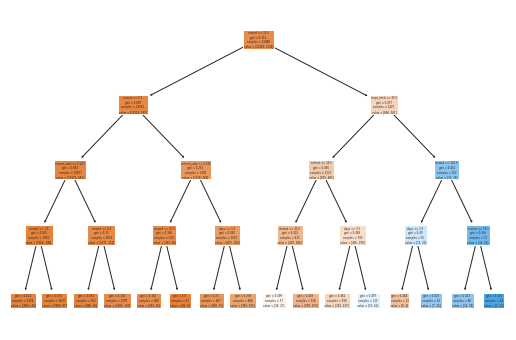

In [375]:
tree.plot_tree(best_clf, feature_names=list(X),
               # class_names=['Died', 'Survived'],
               filled=True);

In [376]:
y_pred = best_clf.predict(X_test)

In [377]:
metrics.precision_score(y_test, y_pred)

0.5396825396825397

In [378]:
metrics.recall_score(y_test, y_pred)

0.10725552050473186

In [379]:
metrics.f1_score(y_test, y_pred)

0.17894736842105263

In [380]:
metrics.roc_auc_score(y_test, y_pred)

0.5501588607308349

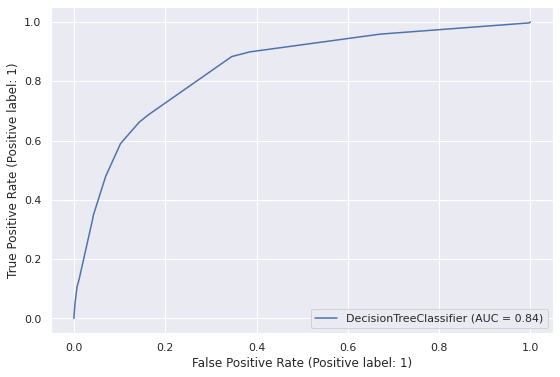

In [381]:
metrics.plot_roc_curve(best_clf, X_test, y_test)

---
Logistic Regression

In [384]:
from sklearn.linear_model import LogisticRegressionCV

In [385]:
clf = LogisticRegressionCV(cv=5)

In [386]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5)

In [387]:
y_pred = clf.predict(X_test)

In [388]:
metrics.precision_score(y_test, y_pred)

0.550561797752809

In [389]:
metrics.recall_score(y_test, y_pred)

0.15457413249211358

In [390]:
metrics.f1_score(y_test, y_pred)

0.24137931034482757

In [391]:
metrics.roc_auc_score(y_test, y_pred)

0.5725023772508414

---
KNeighborsClassifier

In [392]:
from sklearn.neighbors import KNeighborsClassifier

In [393]:
clf = KNeighborsClassifier()

In [394]:
search = GridSearchCV(clf, param_grid={'n_neighbors': range(10, 20),
                                       'leaf_size': range(1, 11)})

In [395]:
search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(1, 11),
                         'n_neighbors': range(10, 20)})

In [398]:
search.best_params_

{'leaf_size': 1, 'n_neighbors': 18}

In [397]:
best_clf = search.best_estimator_

In [399]:
y_pred = best_clf.predict(X_test)

In [400]:
metrics.precision_score(y_test, y_pred)

0.4177215189873418

In [401]:
metrics.recall_score(y_test, y_pred)

0.10410094637223975

In [402]:
metrics.f1_score(y_test, y_pred)

0.16666666666666666

In [403]:
metrics.roc_auc_score(y_test, y_pred)

0.5465480808416222